# Importing Libraries 

In [270]:
# Importing all neccesary libraries
# %pip install pandas scikit-learn

import pandas as pd # Pandas
import numpy as np # Numpy
from scipy import stats # Scipy - for statistics
import matplotlib.pyplot as plt # Matplotlib - for ploting
import seaborn as sns # Seaborn - for ploting
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from tabulate import tabulate


In [ ]:
import numpy as np

phy = [15, 12, 8, 8, 7, 7, 7, 6, 5, 3]
hist = [10, 25, 17, 11, 13, 17, 20, 13, 9, 15]

e_phy = phy - np.mean(phy)
e_hist = hist - np.mean(hist)

num = np.dot(e_phy, e_hist)

den = np.sqrt(np.dot(e_phy, e_phy) * np.dot(e_hist, e_hist))

r = num / den
print(r)

print('r represents the kerl pearson correlation coefficient between physics and history scores')

# Short method of the kerl pearson correlation coefficient
r_2 = np.corrcoef(phy, hist)[0, 1]
print(r_2)

p = phy.mean() 



0.14499815458068518
r represents the kerl pearson correlation coefficient between physics and history scores
0.14499815458068518


: 

# Importing Data 

In [271]:
# Importing data 
diebetes_df = pd.read_excel('Diabetes_Data.xlsx')
titanic_df = pd.read_csv('titanic3.csv')

# Question 3

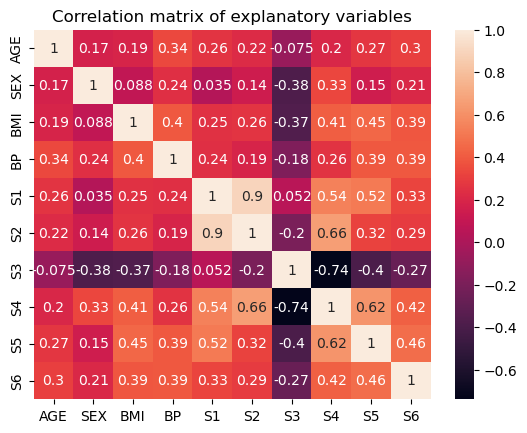

Greatest correlation:  0.8966629578104903
Least correlation:  -0.7384927292583829

Model1 parameters: 
Parameter coefficient values :  [-3.63612242e-02 -2.28596481e+01  5.60296209e+00  1.11680799e+00
 -1.08999633e+00  7.46450456e-01  3.72004715e-01  6.53383194e+00
  6.84831250e+01  2.80116989e-01]
Intercept:  -334.56713851878715

Model1 performance with all 10 parameters
Adjusted R^2:  0.5177484222203498
Mean squared error:  2859.6963475867506
P-values:  const    1.016617e-06
AGE      8.670306e-01
SEX      1.041671e-04
BMI      4.296391e-14
BP       1.024278e-06
S1       5.794761e-02
S2       1.603902e-01
S3       6.347233e-01
S4       2.734587e-01
S5       1.555899e-05
S6       3.059895e-01
dtype: float64


'\n# Stepwise for forward selection\ndef forward_selection(data, target, significance_level=0.05): # Using P-values with a threshole of 0.05\n    initial_features = data.columns.tolist()\n    best_features = []\n    while (len(initial_features)>0):\n        remaining_features = list(set(initial_features)-set(best_features))\n        new_pval = pd.Series(index=remaining_features)\n        for new_column in remaining_features:\n            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()\n            new_pval[new_column] = model.pvalues[new_column]\n        min_p_value = new_pval.min()\n        if(min_p_value<significance_level):\n            best_features.append(new_pval.idxmin())\n        else:\n            break\n    return best_features\n\n\nprint("Selected variables - Stepwise Regression: ",forward_selection(X, Y, 0.05,))\n\n# Print the best features\nprint(\'\nBest features: \', forward_selection(X, Y))\n\n#diebetes_df\n'

In [272]:
# Correlation matrix of explanatory variables
exp_variables_df = diebetes_df[['AGE', 'SEX', 'BMI','BP','S1','S2','S3','S4','S5','S6']]
corr_metrics = exp_variables_df.corr() 

# Hitmap of correlation matrix
sns.heatmap(corr_metrics, annot=True)
plt.title('Correlation matrix of explanatory variables')
plt.show()

# Print the greatest correlation and the least correlation
max_corr = corr_metrics[corr_metrics != 1].max().max()
min_corr = corr_metrics.min().min()
print('Greatest correlation: ', max_corr)
print('Least correlation: ', min_corr)

# Multivariate linear model using all 10 variables with a constant by default.
X = exp_variables_df
Y = diebetes_df['Y']
diebete_lm = LinearRegression()
diebete_lm.fit(X,Y)

# Slope, intercept and R^2
slope, intercept, r_squared, MSE = diebete_lm.coef_, diebete_lm.intercept_, diebete_lm.score(X,Y), np.mean((diebete_lm.predict(X) - Y) ** 2)

# Print diebete_lm model coefficients
print('\nModel1 parameters: ')
print('Parameter coefficient values : ', slope)
print('Intercept: ', intercept)


# Printing adjuste R^2 and mean squared error
print('\nModel1 performance with all 10 parameters')
print('Adjusted R^2: ', r_squared)
print('Mean squared error: ', MSE)

# Get the p-values for each variable using statsmodels
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
p_values = results.pvalues

# Print p-values
print('P-values: ', p_values)

"""
# Stepwise for forward selection
def forward_selection(data, target, significance_level=0.05): # Using P-values with a threshole of 0.05
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features


print("Selected variables - Stepwise Regression: ",forward_selection(X, Y, 0.05,))

# Print the best features
print('\nBest features: ', forward_selection(X, Y))

#diebetes_df
"""

Model using selected features from stepwise forward regression

In [273]:
# Features 
X1 = exp_variables_df # Independent variables
Y1 = diebetes_df['Y']

def forward_regression(X, y,
                       threshold_in,
                       verbose=False):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded) 
        for new_column in excluded: 
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()#
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return included

print("Selected variables (Stepwise Forward  Regression): ",forward_regression(X1, Y1, 0.05,))

Selected variables (Stepwise Forward  Regression):  ['BMI', 'S5', 'BP', 'S1', 'SEX', 'S2']


In [274]:
# Model with Forward selected features 
X = exp_variables_df[forward_regression(exp_variables_df, diebetes_df['Y'], threshold_in=0.05)]
Y = diebetes_df['Y']
diebete_lm2 = LinearRegression()
diebete_lm2.fit(X,Y)

# MSE and R^2 of linear model with forward selected features
r_squared2, MSE2 = diebete_lm2.score(X,Y), np.mean((diebete_lm2.predict(X) - Y) ** 2)

# Print adjuste R^2 and mean squared error
print('\nModel1 performance with significant parameters')
print('Adjusted R^2: ', r_squared2)
print('Mean squared error: ', MSE2)

# Comparing the two models
print('R^2 difference: ', r_squared - r_squared2)
print('MSE difference: ', MSE - MSE2)

# Conclusion
print('\nModel2 with forward selected features is better than model1 with all features because it has a higher R^2 and a lower MSE.')




Model1 performance with significant parameters
Adjusted R^2:  0.5148837959256445
Mean squared error:  2876.683251787016
R^2 difference:  0.002864626294705297
MSE difference:  -16.9869042002656

Model2 with forward selected features is better than model1 with all features because it has a higher R^2 and a lower MSE.


# Quesiton 4

In [275]:
# Statistical breakdown of the titanic dataset

# Gender breakdown
males = (titanic_df['sex'] == 'male').sum()
survived_males = ((titanic_df['sex'] == 'male') & (titanic_df['survived'] == 1)).sum()
females = (titanic_df['sex'] == 'female').sum()
survived_females = ((titanic_df['sex'] == 'female') & (titanic_df['survived'] == 1)).sum()

# Passenger class breakdown 
first_class = (titanic_df['pclass'] == 1).sum()
survived_class01 = ((titanic_df['pclass'] == 1) & (titanic_df['survived'] == 1)).sum()
second_class = (titanic_df['pclass'] == 2).sum()
survived_class02 = ((titanic_df['pclass'] == 2) & (titanic_df['survived'] == 1)).sum()
third_class = (titanic_df['pclass'] == 3).sum()
survived_class03 = ((titanic_df['pclass'] == 3) & (titanic_df['survived'] == 1)).sum()

# Group by age group Children (0-12), Adolescents (13-19), Young Adults (20-34), Middle-Aged Adults (35-64), Seniors (65+)
titanic_df['age_group'] = pd.cut(titanic_df['age'], bins=[0, 12, 19, 34, 64, 120], labels=['Children', 'Adolescents', 'Young Adults', 'Middle-Aged Adults', 'Seniors'])

# Age group breakdown
children = (titanic_df['age_group'] == 'Children').sum()
adolescents = (titanic_df['age_group'] == 'Adolescents').sum()
young_adults = (titanic_df['age_group'] == 'Young Adults').sum()
middle_aged_adults = (titanic_df['age_group'] == 'Middle-Aged Adults').sum()
seniors = (titanic_df['age_group'] == 'Seniors').sum()  

survived_children = ((titanic_df['age_group'] == 'Children') & (titanic_df['survived'] == 1)).sum()
survived_adolescents = ((titanic_df['age_group'] == 'Adolescents') & (titanic_df['survived'] == 1)).sum()
survived_young_adults = ((titanic_df['age_group'] == 'Young Adults') & (titanic_df['survived'] == 1)).sum()
survived_middle_aged_adults = ((titanic_df['age_group'] == 'Middle-Aged Adults') & (titanic_df['survived'] == 1)).sum()
survived_seniors = ((titanic_df['age_group'] == 'Seniors') & (titanic_df['survived'] == 1)).sum()

# Survival table probabilities 
survival_prob_data = []

# Calculating probabilities by gender and appendding to the list
survival_prob_data.append({'Category': 'Male', 'Survival Probability': survived_males / males})
survival_prob_data.append({'Category': 'Female', 'Survival Probability': survived_females / females})

# Calculating probabilities by class and appendding to the list
survival_prob_data.append({'Category': 'First Class', 'Survival Probability': survived_class01 / first_class})
survival_prob_data.append({'Category': 'Second Class', 'Survival Probability': survived_class02 / second_class})
survival_prob_data.append({'Category': 'Third Class', 'Survival Probability': survived_class03 / third_class})

# Calculating probabilities by age group and appendding to the list
survival_prob_data.append({'Category': 'Children', 'Survival Probability': survived_children / children})
survival_prob_data.append({'Category': 'Adolescents', 'Survival Probability': survived_adolescents / adolescents})
survival_prob_data.append({'Category': 'Young Adults', 'Survival Probability': survived_young_adults / young_adults})
survival_prob_data.append({'Category': 'Middle-Aged Adults', 'Survival Probability': survived_middle_aged_adults / middle_aged_adults})
survival_prob_data.append({'Category': 'Seniors', 'Survival Probability': survived_seniors / seniors})

# Create a DataFrame from the list
survival_probs = pd.DataFrame(survival_prob_data)

# Print tabulated survival probabilities
print(tabulate(survival_probs, headers='keys', tablefmt='pretty', showindex=False))

titanic_df.head()

# Count number of survivors and non-survivors
survivors = titanic_df['survived'].sum()
non_survivors = titanic_df['survived'].count() - survivors
print('Survivors: ', survivors) 
print('Non-survivors: ', non_survivors) 

+--------------------+----------------------+
|      Category      | Survival Probability |
+--------------------+----------------------+
|        Male        | 0.19098457888493475  |
|       Female       |  0.7274678111587983  |
|    First Class     |  0.6191950464396285  |
|    Second Class    |  0.4296028880866426  |
|    Third Class     |  0.2552891396332863  |
|      Children      |  0.574468085106383   |
|    Adolescents     |  0.3969465648854962  |
|    Young Adults    |  0.3818565400843882  |
| Middle-Aged Adults | 0.41317365269461076  |
|      Seniors       | 0.15384615384615385  |
+--------------------+----------------------+
Survivors:  500
Non-survivors:  809



Titanic Model Parameters:
Intercept:  [1.4858098]
Coefficients:  [[-0.94144788  2.4532012  -0.87383816 -0.58911177 -1.12308126 -1.21244751]]
Titanic Confusion Matrix:
[[141  23]
 [ 32  65]]


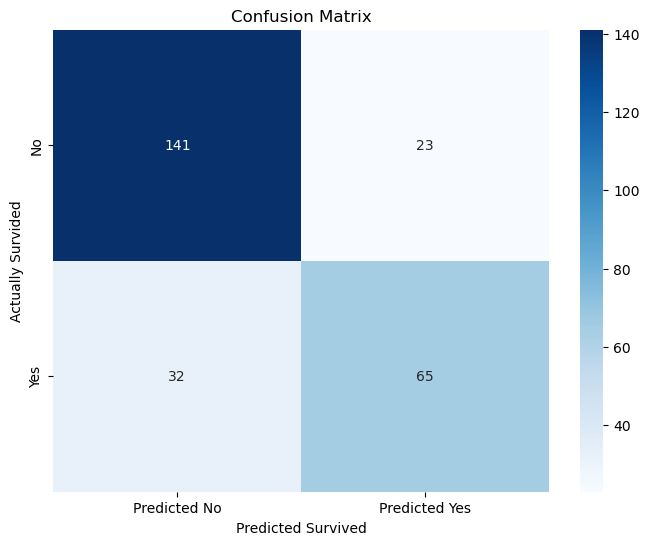


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       164
           1       0.74      0.67      0.70        97

    accuracy                           0.79       261
   macro avg       0.78      0.76      0.77       261
weighted avg       0.79      0.79      0.79       261

R-squared value:  0.789272030651341


In [276]:
# Basic preprocessing
titanic_df.dropna(subset=['age', 'embarked'], inplace=True)
titanic_df['sex'] = titanic_df['sex'].map({'male': 0, 'female': 1})

# Convert 'age_group' to numeric (one-hot encoding)
titanic_df = pd.get_dummies(titanic_df, columns=['age_group'], drop_first=True)

# Select features and target
features = ['pclass', 'sex'] + [col for col in titanic_df.columns if 'age_group_' in col] 
#features = ['pclass', 'sex', 'age_group']

X = titanic_df[features]
y = titanic_df['survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

results2 = model.predict(X_test)


# Predict on the test set
y_pred = model.predict(X_test)

# Print the model parameters
print("\nTitanic Model Parameters:")
print("Intercept: ", model.intercept_)
print("Coefficients: ", model.coef_)

"""
# Testing parameters for significance
X_train = sm.add_constant(X_train)
model = sm.Logit(y_train, X_train)
results = model.fit()
p_values = results.pvalues

# Print p-values
print("\nP-values for Titanic Model:")  
print(p_values)
"""

# Evaluate the model
cm = confusion_matrix(y_test, y_pred) 
print("Titanic Confusion Matrix:")
print(cm)

# Plot confusion matriX Using Seaborn

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Survived')
plt.ylabel('Actually Survided')
plt.show()

report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

# Calculating R-squared value
r_squared = model.score(X_test, y_test)
print("R-squared value: ", r_squared)



In [277]:
# Ensure all data is numeric and free of NaN values
X_train_const = sm.add_constant(X_train).astype(float)
y_train = y_train.astype(float)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_const)
results = logit_model.fit()

# Print the summary of the model
print("\nLogistic Regression Model Summary:")
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.474676
         Iterations 6

Logistic Regression Model Summary:
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  783
Model:                          Logit   Df Residuals:                      776
Method:                           MLE   Df Model:                            6
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                  0.3019
Time:                        23:53:53   Log-Likelihood:                -371.67
converged:                       True   LL-Null:                       -532.39
Covariance Type:            nonrobust   LLR p-value:                 2.078e-66
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.9